# Array Factor of a Linear Array
The array factor of an N-element linear array can be computed as \[Balanis p. 293\]

$$ AF=\sum_{n=1}^N{e^{j(n-1)\beta}}e^{j(n-1)kd \cos{\theta}} $$

or compactly as

$$ AF = \sum_{n=1}^{N}{e^{j(n-1)\psi}} $$

where 

$$ \psi = kd \cos{\theta + \beta} $$

where $N$ is the number of elements in the array, $d$ is the distance between the elements, $\theta$ is the angle, $\beta$ is the phase shift between elements, and $k$ is the wave number.

$$ k = \frac{2\pi}{\lambda} $$

The phase shift $\beta$ that gives maximum output in a desired angle can be found with \[Balanis p. 319\]

$$ \beta = -kd \cos{\theta_0} $$


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matlab.engine
from Code import array_analysis as ar
from Code import plot_utils
import mpl_toolkits.mplot3d.axes3d as axes3d

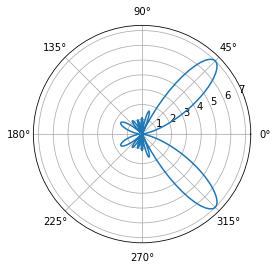

In [1]:
wave_length = 1
k = 2*np.pi/wave_length # Wave number
d = 1/2 # Distance between elements
desired_angle = np.pi*(1/4)
beta = -k*d*np.cos(desired_angle) # Phase shift
psi = lambda theta: k*d*np.sin(theta + beta)
N=7 # Number of elements in the array

array_factor = lambda theta: np.sum([np.exp(1j*(n-1)*beta)*np.exp(1j*(n-1)*k*d*np.cos(theta)) for n in range(1,N+1)])

angles = np.linspace(0, 2*np.pi, num=256)

plt.polar(angles, np.abs([array_factor(angle) for angle in angles]))
plt.show()
#plt.plot(angles, np.abs([array_factor(angle) for angle in angles]))
#plt.show()

# Array Factor of a Planar Array (rectangular grid)

Assuming a uniformly spaced grid of even numbers of emitters M and N, the array factor can be calculated as following \[Balanis p. 945\]:

$$ [AF(\theta, \phi)]_{M\times N} = 4 \sum_{m=1}^{M/2}{ \sum_{n=1}^{N/2}{w_{mn}}\cos[(2m-1)u] \cos[(2n-1)v] } $$

where

$$ u = \frac{\pi d_x}{\lambda}(\sin{\theta}\cos{\phi}-\sin{\theta _0}\cos{\phi _0}) $$

and

$$ v = \frac{\pi d_y}{\lambda}(\sin{\theta}\sin{\phi}-\sin{\theta _0}\sin{\phi _0}) $$

$w_{mn}$ is the amplitude exitation of the individual element. $d_x$ and $d_y$ are the spacings between elements in the $x$ and $y$ directions.
For separable distributions $w_{mn}=w_m w_n$

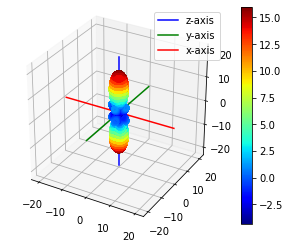

(<Figure size 432x288 with 2 Axes>, <Axes3DSubplot:>)

In [2]:
import mpl_toolkits.mplot3d.axes3d as axes3d
# from mayavi import mlab # may be used for better plots

def planar_array_factor(w, theta, phi, dx, dy, wave_length, 
                        theta_null, phi_null):
    M, N = np.shape(w)
    
    u = (np.pi*dx/wave_length) * \
        (np.sin(theta)*np.cos(phi) - \
        np.sin(theta_null)*np.cos(phi_null)
        )
    
    v = (np.pi*dy/wave_length) * \
        (np.sin(theta)*np.sin(phi) - \
        np.sin(theta_null)*np.sin(phi_null)
        )
    
    AF = np.zeros(np.shape(u))

    for m in range(int(M/2)):
        for n in range(int(N/2)):
            AF += w[m,n] * np.cos((2*(m+1)-1)*u) * np.cos((2*(n+1)-1)*v)
    AF = 4*AF
    return AF


# Inspired by https://stackoverflow.com/questions/36816537/spherical-coordinates-plot-in-matplotlib
# and https://matplotlib.org/2.0.2/examples/mplot3d/surface3d_radial_demo.html

theta, phi = np.linspace(0,2*np.pi, 200), np.linspace(0, np.pi, 300)
THETA, PHI = np.meshgrid(theta, phi)

w = np.ones((4,4))
wave_length = 1
dx = wave_length/2
dy = wave_length/2

R = planar_array_factor(w, THETA, PHI, dx, dy, wave_length, 0, 0)


X = np.abs(R) * np.sin(THETA) * np.cos(PHI)
Y = np.abs(R) * np.sin(THETA) * np.sin(PHI)
Z = np.abs(R) * np.cos(THETA)
from matplotlib import cm, colors

# color mapping from
# https://stackoverflow.com/questions/39520555/matplotlib-colored-sphere
#norm = colors.Normalize(vmin=np.min(np.abs(R)),vmax=np.max(np.abs(R)), clip=False) 

#fig = plt.figure()
#ax = fig.add_subplot(1,1,1, projection='3d')
#ax.set_xlim(-np.max(R),np.max(R))
#ax.set_ylim(-np.max(R),np.max(R))
#ax.set_zlim(-np.max(R),np.max(R))
#plot = ax.plot_surface(
#    X,Y,Z, rstride=1, cstride=1, cmap='plasma',
#    linewidth=5, edgecolor='black', antialiased=True, alpha=1,
#    facecolors=cm.nipy_spectral(norm(np.abs(R))))
#plt.show()
plot_utils.spherical_surface_plot(R, THETA, PHI)

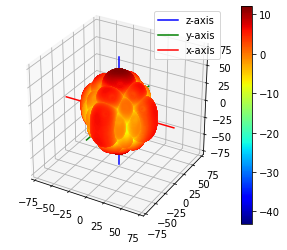

(<Figure size 432x288 with 2 Axes>, <Axes3DSubplot:>)

In [4]:
from Code import array_analysis as ar
arr = ar.RectangularArray(Nx = 4, Ny=4)
arr.plot_array_factor_3D()

In [5]:
ctrl = ar.LinearPhaseController(arr)
ctrl.set_steering_direction(np.pi/4, np.pi/4)
#ctrl.array.plot_array_factor_3D()


array([[ 1.        +0.j        , -0.50125514-0.86529953j,
        -0.49748657+0.86747168j,  0.99999054-0.00434974j],
       [-0.50125514-0.86529953j, -0.49748657+0.86747168j,
         0.99999054-0.00434974j, -0.50501423-0.86311102j],
       [-0.49748657+0.86747168j,  0.99999054-0.00434974j,
        -0.50501423-0.86311102j, -0.49370858+0.86962741j],
       [ 0.99999054-0.00434974j, -0.50501423-0.86311102j,
        -0.49370858+0.86962741j,  0.99996216-0.00869941j]])

In [5]:
import matlab.engine
eng = matlab.engine.start_matlab()
eng.addpath(r'.\\Code')
eng.rect_array(nargout=0)

In [6]:
from Code import array_analysis as ar
steering_angles = [0, np.pi/8, np.pi/4]
for angle in steering_angles:
    W = ctrl.set_steering_direction(angle, 0)
    #betas = (360/(2*np.pi)*np.angle(W)).flatten()
    betas = (360/(2*np.pi)*ctrl.array.phase_shifts).flatten()
    eng.workspace['PhaseShift'] = matlab.double(betas.tolist())
    eng.set(eng.workspace['arrayObject'],'PhaseShift',eng.workspace['PhaseShift'])
    eng.figure(nargout=0)
    eng.arrayFactor(eng.workspace['arrayObject'],10*1e9, nargout=0)
    #eng.beamwidth(eng.workspace['arrayObject'],10e9,0,matlab.double([_ for _ in range(360)]),nargout=0)



NameError: name 'eng' is not defined

In [6]:
eng.quit()

Steering angle: 0.0°
Peak theta angle: -0.3°
Prominence: 0.9999
Amplitude: 0.9999
Amplitude_b: 1.0000
Width: 35.9259°
Width height: 0.4999
Is width height close? True
Side lobe level: -5.6512 dB


Steering angle: 22.5°
Peak theta angle: 157.4°
Prominence: 0.9908
Amplitude: 1.0000
Amplitude_b: 1.0000
Width: 39.2226°
Width height: 0.5046
Is width height close? False
Side lobe level: -5.6517 dB


Steering angle: 45.0°
Peak theta angle: 134.9°
Prominence: 0.9981
Amplitude: 1.0000
Amplitude_b: 1.0000
Width: 132.8273°
Width height: 0.5009
Is width height close? False
Side lobe level: -5.6516 dB


Steering angle: 67.5°
Peak theta angle: 112.3°
Prominence: 0.9987
Amplitude: 1.0000
Amplitude_b: 1.0000
Width: 103.9045°
Width height: 0.5006
Is width height close? False
Side lobe level: -5.6517 dB


Steering angle: 90.0°
Peak theta angle: 89.7°
Prominence: 0.9972
Amplitude: 1.0000
Amplitude_b: 1.0000
Width: 92.3383°
Width height: 0.5014
Is width height close? False
Side lobe level: -5.6520 dB




<Figure size 432x288 with 0 Axes>

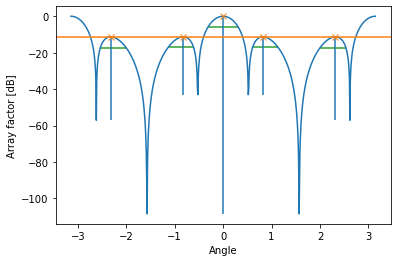

<Figure size 432x288 with 0 Axes>

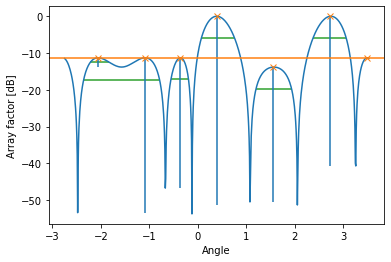

<Figure size 432x288 with 0 Axes>

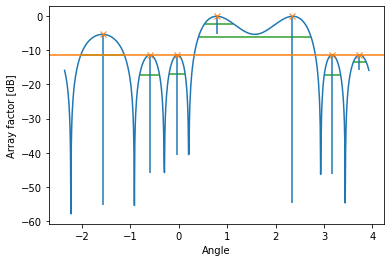

<Figure size 432x288 with 0 Axes>

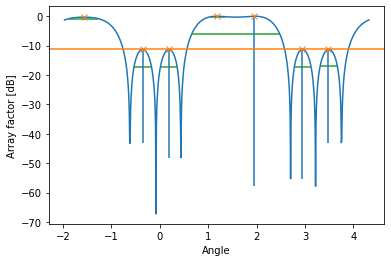

<Figure size 432x288 with 0 Axes>

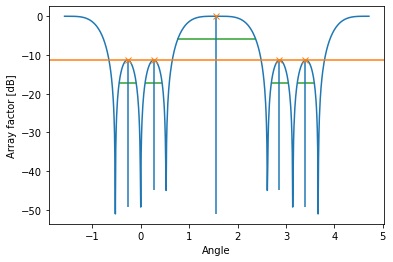

In [7]:
from Code import array_analysis as ar
steering_angles = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
arr = ar.RectangularArray(Nx = 4, Ny=4)
ctrl = ar.LinearPhaseController(arr)
arr.dx = arr.wave_length/2
arr.dy = arr.wave_length/2
cmap = plt.get_cmap("tab10")
deg = u"\N{DEGREE SIGN}"

for angle in steering_angles:
    #arr.plot_array_factor_3D(theta_null=angle, phi_null=0,
    #                    scale='logarithmic')
    fig = plt.figure()
    side_lobe_level = arr.get_side_lobe_level(theta_null=angle, phi_null=0)
    fig, ax = arr.plot_array_factor_vertical(theta_null=angle, phi_null=0, 
                                        polar=False, scale='dB')
    
    beam_info = arr.get_af_main_beam(theta_null=angle, phi_null=0)
    print(f"Steering angle: {angle*360/(2*np.pi):.1f}{deg}")
    print(f"Peak theta angle: {beam_info['peak_theta']*360/(2*np.pi):.1f}{deg}")
    print(f"Prominence: {beam_info['prominence']:.4f}")
    print(f"Amplitude: {beam_info['amplitude']:.4f}")
    print(f"Amplitude_b: {beam_info['amplitude_b']:.4f}")
    print(f"Width: {beam_info['width']*360/(2*np.pi):.4f}{deg}")
    print(f"Width height: {beam_info['width_height']:.4f}")
    print(f"Is width height close? "
            f"{np.allclose(beam_info['width_height'], beam_info['amplitude']/2)}")
    side_lobe_line = 20*np.log10(side_lobe_level*beam_info['amplitude'])
    #side_lobe_line = side_lobe_level*beam_info['amplitude']
    ax.axhline(y=side_lobe_line, color=cmap(1))
    print(f'Side lobe level: {10*np.log10(side_lobe_level):.4f} dB')
    print(f"\n")